# Numpy For Dummy

## 為什麼要用 numpy

* 專注處理向量, 比較快
* 比較節省記憶體
* 是其他數值運算套件的基礎


# 如果你的朋友想立刻學來用

0. pip 幾乎都有 wheel 可用了，不難裝了
1. anaconda : 處理非 python 的相依問題
2. Microsoft 的 azure notebook


## 習慣的開頭



In [77]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.misc


## 不常做下面兩種


In [ ]:
from numpy import *
from numpy import sum


In [47]:
import random

def normal_sum():
    return sum([random.random() for i in range(10000)])

%timeit normal_sum()

1000 loops, best of 3: 1.2 ms per loop


In [5]:
def np_sum():
    data = np.random.random(10000)
    return np.sum(data)

%timeit np_sum()

10000 loops, best of 3: 109 µs per loop


### 一樣的複雜度，速度差了 10 倍

In [13]:
import sys
py_list = list(range(1000))

print(sys.getsizeof(py_list))

print(sys.getsizeof(np.arange(1000, dtype=np.uint16)))

9120
2096


###  可以調整空間的使用

# 把 > 5 的資料設為 -1


In [135]:
data = range(10)
# without numpy
for i, d in enumerate(data):
    if d > 5:
        data[i] = -1
print data

[0, 1, 2, 3, 4, 5, -1, -1, -1, -1]


In [136]:
data = np.array(data)
data[data > 5] = 1
print data

[ 0  1  2  3  4  5 -1 -1 -1 -1]


## np.array 跟 python list 在記憶體上的差別

* numpy 核心的 buffer 是連續的空間
* python list 都是儲存 reference，另外指向物件 
* 如果儲存大張的圖片，python list會耗費許多額外的記憶體



## C integer V.S. Python Integer Object

![nice](./images/python_obj.png)

![nice](./images/python_integer.png)

## Numpy Array V.S. Python list

![nice](./images/numpy_list.png)

## 開始使用

* 可以從 list 直接產生
* 有許多方法讓你產生需要的資料



In [140]:
np.array([1,2,3,4], dtype=np.float)

array([ 1.,  2.,  3.,  4.])

In [44]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [43]:
np.arange(5, step=0.5)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

In [142]:
np.linspace(start=0, stop=100, num=10)

array([   0.        ,   11.11111111,   22.22222222,   33.33333333,
         44.44444444,   55.55555556,   66.66666667,   77.77777778,
         88.88888889,  100.        ])

## 多維資料

* python 通常是寫巢狀的 list
* numpy array 初始化的方法很豐富
    * 使用巢狀的 list
    * 一開始就指定 shape 
    * 或是另外改變 shape
    * 或是把多組資料組合起來


In [143]:
Z = [[0,0,0,0,0,0],
     [0,0,0,0,0,0]]
Z

[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]

In [46]:
np.zeros(shape=(2,6))

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [146]:
np.zeros(12).reshape((2,6))

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [14]:
element = [1,2,3]
np.tile(element, reps=(2,2))

array([[1, 2, 3, 1, 2, 3],
       [1, 2, 3, 1, 2, 3]])

## sample 製作圖片


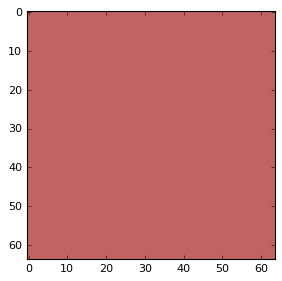

In [32]:
# Use Tile

pixel = [254,0,0, 100]  # RGBA, 紅色的
size = 64,64,1

pic = np.tile(pixel, reps=size)  # first one with color
plt.imshow(pic)


## slice, index

* python 建立的多維陣列，每一維都是不同物件
* numpy array 維護了一塊連續的 buffer, 但是 array 依照不同的取值方式，回傳不同的資料

In [148]:
Z = [range(5),
     range(6, 10)]
print Z
print ""
print "Z[0]          ", Z[0]
print "Z[0][1]       ", Z[0][1]
print "Z[0][1:2]     ", Z[0][1:2]


[[0, 1, 2, 3, 4], [6, 7, 8, 9]]

Z[0]           [0, 1, 2, 3, 4]
Z[0][1]        1
Z[0][1:2]      [1]


In [66]:
Z = np.arange(10).reshape(2,5)
print Z
print ""
print "Z[0]          ", Z[0]
print "Z[0][1]       ", Z[0][1]
print "Z[0][1:2]     ", Z[0][1:2]

[[0 1 2 3 4]
 [5 6 7 8 9]]

Z[0]           [0 1 2 3 4]
Z[0][1]        1
Z[0][1:2]      [1]


In [68]:
print Z[:,1:3]

[[1 2]
 [6 7]]


##  都是 Slicing，回傳的資料完全不同

* Slice 就是 Z[0:1] 中間那個 0:1

b = Z[0:1] 

* python list: 會建立一個新 list, 把 Reference 複製進去 list
* numpy array 會建立一個新的 view. 不會 copy reference。
* b 的任何更動，都是更動原本的 array 內的 buffer

In [41]:
# Z and b 都是不同的 list
Z = range(10)
b = Z[0:2]
print 'b is  : ', b
b[0] = -1
print 'new b :', b
print 'Z     :', Z

b is  :  [0, 1]
new b : [-1, 1]
Z     : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [49]:
Z = np.arange(10)
b = Z[0:2]
b[0] = -1000
Z

array([-1000,     1,     2,     3,     4,     5,     6,     7,     8,     9])

## 如何複製？ 如何read only？

In [51]:
Z = np.arange(10)
b = Z[0:2]
b.flags.writeable = False
b[0] = -1
print Z


ValueError: assignment destination is read-only

# 需要明確的 copy

In [154]:
Z = np.arange(10)
b = Z[0:2].copy()
b[0] = -1
print "Z", Z
print "b", b

Z [0 1 2 3 4 5 6 7 8 9]
b [-1  1]


## ufun, univesal function
* 可以拿 numpy array 當作 input
* 提供類似 python map, reduce 的功能
* 還提供兩倆配對運算的功能
* numpy, scipy 提供滿滿的 ufun


In [156]:
np.add(np.arange(10), np.arange(10))

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [157]:
np.add(np.arange(10), 100)

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109])

In [158]:
np.arange(10) + 100

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109])

In [159]:
np.arange(10) > 5

array([False, False, False, False, False, False,  True,  True,  True,  True], dtype=bool)

## 除了直接 element wise 做運算，還可以 pair wise 

In [161]:
np.add.outer(np.arange(10), np.arange(10))

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]])

## sample: 漸層

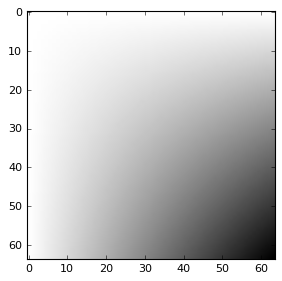

In [72]:
source = np.linspace(0,1, 64)
gradient = np.outer(source, source)
plt.imshow(gradient, cmap=plt.cm.binary)

## 更多 fnacy 的 indexing

* 傳入同樣 shape 的 boolean array
  * 只要為 True 的元素，就可以拿出資料來


In [56]:
data = np.arange(10, 0, -1)
print data > 5

[ True  True  True  True  True False False False False False]


In [57]:
data[ data > 5 ]

array([10,  9,  8,  7,  6])

In [164]:
##  5 跟 8 之間的資料

data[ (data > 5) & (data <=8)]

array([8, 7, 6])

In [ ]:
## 把 5 到 8 的資料做改變

In [165]:
data[ (data > 5) & (data <=8)] *= -1
print data

[10  9 -8 -7 -6  5  4  3  2  1]


## 針對剛剛的灰階圖做調整

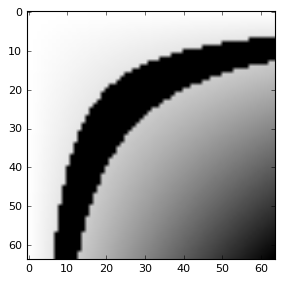

In [74]:
middle = (gradient < 0.2) & (gradient > 0.1)
nwe_gradient = gradient.copy()
nwe_gradient[middle] = 1.0
plt.imshow(nwe_gradient, cmap=plt.cm.binary)

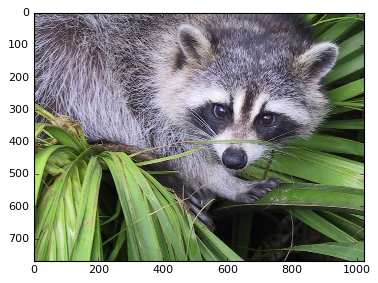

In [78]:
face = scipy.misc.face()
plt.imshow(face)

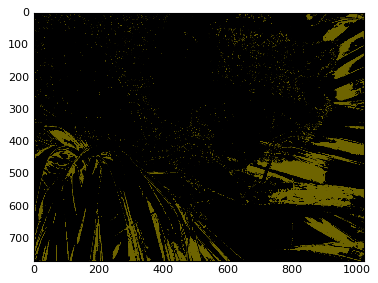

In [79]:
face = scipy.misc.face()

no_red = face[:,:,0] < 110
so_green = face[:,:,1] > 100

target = no_red & so_green

base = np.zeros(face.shape, dtype=np.uint8)

base[target] = [110,100,0]
plt.imshow(base)

## 更多實戰

* distance matrix
* value normalization

## Distance Matrix

* 做 clusterning 很常用到
* 先把所有的座標點距離兩倆算好

In [83]:
position = np.arange(6).reshape(3,2)
print "position"
print position
print ""

dx = np.subtract.outer(position[:, 0], position[:, 0])
print "dx"
print dx
dy = np.subtract.outer(position[:, 1], position[:, 1])
print "dy"
print dy
print ""
distance = np.hypot(dx, dy)
print "distance"
print distance

position
[[0 1]
 [2 3]
 [4 5]]

dx
[[ 0 -2 -4]
 [ 2  0 -2]
 [ 4  2  0]]
dy
[[ 0 -2 -4]
 [ 2  0 -2]
 [ 4  2  0]]

distance
[[ 0.          2.82842712  5.65685425]
 [ 2.82842712  0.          2.82842712]
 [ 5.65685425  2.82842712  0.        ]]


## Scipy  可以幫助你寫的更方便

In [167]:
import scipy.spatial
distance_matric = scipy.spatial.distance.cdist(position, position)
print distance_matric

[[  0.           2.82842712   5.65685425   8.48528137  11.3137085 ]
 [  2.82842712   0.           2.82842712   5.65685425   8.48528137]
 [  5.65685425   2.82842712   0.           2.82842712   5.65685425]
 [  8.48528137   5.65685425   2.82842712   0.           2.82842712]
 [ 11.3137085    8.48528137   5.65685425   2.82842712   0.        ]]


## Normalize Data

* 收集到了資料，看著單一數值會沒有感覺
* 讓所有資料的最大值設為 1，最小值為 0

In [81]:
# 20
fake_data = np.random.randint(0, 100, size=(3,3)).astype(np.float)
print "original"
print fake_data
print ""
data_max, data_min = fake_data.max(), fake_data.min()
fake_data = (fake_data - data_min)/(data_max - data_min)
print "normalized"
print fake_data

original
[[ 28.  62.  55.]
 [  3.  89.  37.]
 [ 50.  45.  90.]]

normalized
[[ 0.28735632  0.67816092  0.59770115]
 [ 0.          0.98850575  0.3908046 ]
 [ 0.54022989  0.48275862  1.        ]]


## Finish !!!

### Hope You Enjoy it 